# 2-D Exploratory Data Analysis

In this notebook we will pick ONE variable you're interested in understanding from your non-census data and plot it against various census variables in scatterplots or dotplots.

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [4]:
%%R
 
# Import data with R
df <- read_csv('combinedwithcensus.csv', show_col_types = FALSE)
df

# A tibble: 2,542 × 132
   `Unnamed: 0` Borough   Borough/Citywide Off…¹ District School `School Name_x`
          <dbl> <chr>     <chr>                     <dbl> <chr>  <chr>          
 1            0 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 2            1 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 3            2 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 4            3 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 5            4 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 6            5 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 7            6 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 8            7 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 9            8 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
10            9 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
# ℹ 

In [5]:
# Import data in python
mtcars = pd.read_csv('combinedwithcensus.csv')
mtcars.head()

,Unnamed: 0,Borough,Borough/Citywide Office (B/CO),District,School,School Name_x,School Category,Program,Language,Language (Translated),...,NAME_y,total_estimate,white_nonhispanic_estimate,black_nonhispanic_estimate,native_nonhispanic_estimate,asian_nonhispanic_estimate,someother_nonhispanic_estimate,two_or_more_nonhispanic_estimate,hispanic_estimate,median_income_estimate
0,0,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,"Census Tract 30.01, New York County, New York",3815.0,2084.0,214.0,0.0,530.0,0.0,0.0,747.0,70057.0
1,1,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,"Census Tract 30.01, New York County, New York",3815.0,2084.0,214.0,0.0,530.0,0.0,0.0,747.0,70057.0
2,2,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,"Census Tract 30.01, New York County, New York",3815.0,2084.0,214.0,0.0,530.0,0.0,0.0,747.0,70057.0
3,3,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,"Census Tract 30.01, New York County, New York",3815.0,2084.0,214.0,0.0,530.0,0.0,0.0,747.0,70057.0
4,4,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,"Census Tract 30.01, New York County, New York",3815.0,2084.0,214.0,0.0,530.0,0.0,0.0,747.0,70057.0


# Exploratory data analysis



## 2-D visualizations (aka scatter plots)

It seems simple. It's not simple. mainly because...

**CORRELATION =/= CAUSATION**

Comparing variables to one another can be TRICKY!

Let's make some 2-D visualizations (aka scatter plots).

Be VERY careful how you phrase the headlines. Take time to think through what you want to say.




R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 35 rows containing missing values (`geom_point()`). 



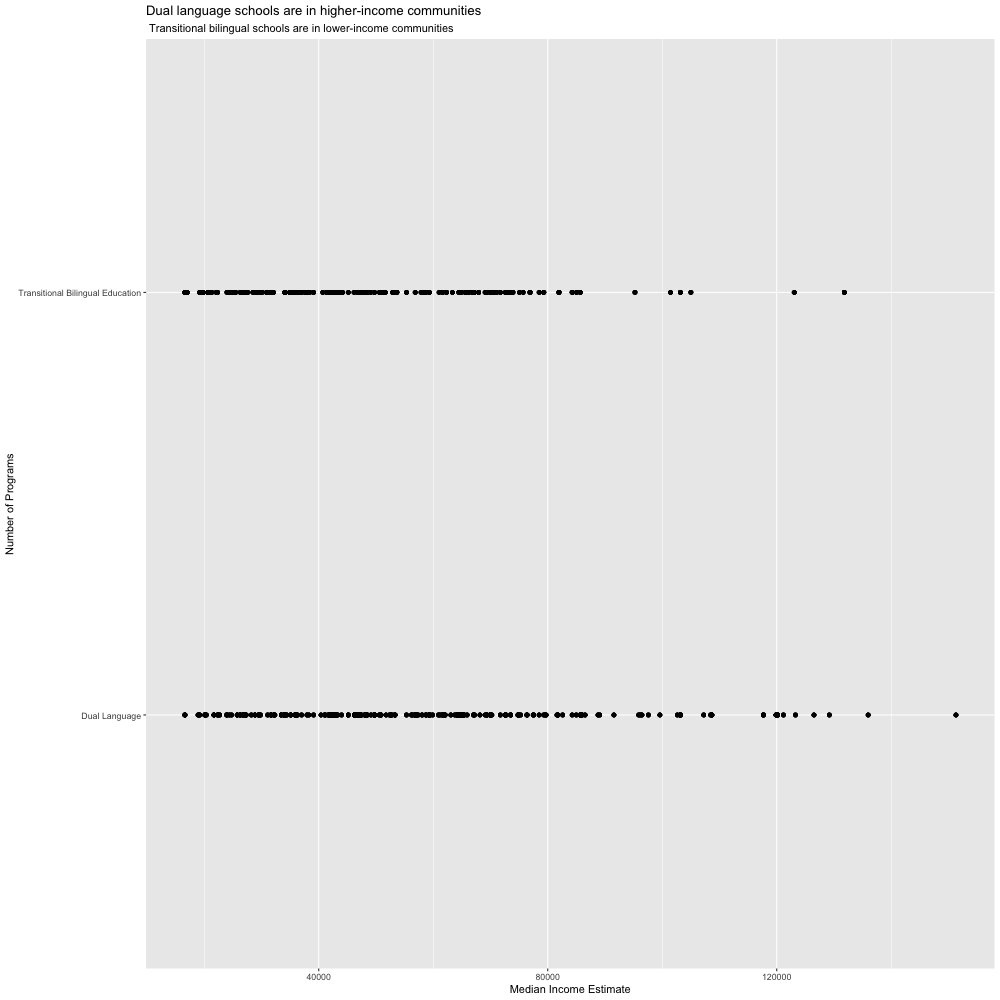

In [6]:
%%R -w 1000 -h 1000

library(ggplot2)

ggplot(df, aes(x = median_income_estimate, y = Program)) +
    geom_point() +
    labs(x = "Median Income Estimate", y = "Number of Programs", subtitle = " Transitional bilingual schools are in lower-income communities") +
    ggtitle("Dual language schools are in higher-income communities")

In [7]:
%%R -o df

 #perform the t test with Program
t.test(median_income_estimate ~ Program, data = df)



	Welch Two Sample t-test

data:  median_income_estimate by Program
t = 9.7996, df = 2347.8, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Dual Language and group Transitional Bilingual Education is not equal to 0
95 percent confidence interval:
  7595.102 11395.189
sample estimates:
                   mean in group Dual Language 
                                      57352.78 
mean in group Transitional Bilingual Education 
                                      47857.64 



In [8]:
%%R

# code for scatter plot 3
# be sure to include a meaningful title and subtitle
#transitional schools vs hispanic population 
#y-median_income_estimate
#x-hispanic_population
#color dots by program
#filter schools with spanish language only

NULL


In [ ]:
#hispanic population in the school vs the census track

#map on ggplot census with the lagitude and longitude for median_income_estimate, = Program